In [1]:
# Installing langchain and openai libraries
!pip install langchain openai
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

#setup the api key
os.environ['OPENAI_API_KEY']=""

#You can get your OpenAI API key from the OpenAI platform.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.6 MB/s eta 0:00:00


In [2]:
# Importing the data
df = pd.read_csv('pkson.csv')
# Initializing the agent
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
              df, verbose=True)
openai = OpenAI(temperature=0.0)
# Openai.model_name # This will print the model being used,
                  # by default it uses ‘text-davinci-003’

In [ ]:
# Checking the shape of data.
agent("What is the shape of the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to find out how many rows and columns the dataset has.
Action: python_repl_ast
Action Input: df.shape
Observation: (195, 23)
Thought: I now know the final answer
Final Answer: The dataset has 195 rows and 23 columns.

> Finished chain.


{'input': 'What is the shape of the dataset?',
 'output': 'The dataset has 195 rows and 23 columns.'}

In [3]:
agent("What kind of analysis can be generated from this dataset")



> Entering new AgentExecutor chain...
Thought: I need to understand what kind of data is in this dataset
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA      

{'input': 'What kind of analysis can be generated from this dataset',
 'output': 'This dataset contains numerical data which can be used for statistical analysis such as descriptive statistics, correlation analysis, and predictive modelling.'}

In [5]:
agent("Build an EDA model for this dataset")



> Entering new AgentExecutor chain...
Thought: I need to explore the data to build a model
Action: python_repl_ast
Action Input: df.describe()
Observation:        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0

{'input': 'Build an EDA model for this dataset',
 'output': 'The EDA model should include exploring the descriptive statistics of the data, such as the mean, standard deviation, min, max, and quartiles.'}



> Entering new AgentExecutor chain...
Thought: I need to create a bar graph using the status column.
Action: python_repl_ast
Action Input: df['status'].value_counts().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar graph showing the distribution of people suffering with pkson using the status column.

> Finished chain.


{'input': 'Show the distribution of people suffering with pkson using bar graph using status column.',
 'output': 'A bar graph showing the distribution of people suffering with pkson using the status column.'}

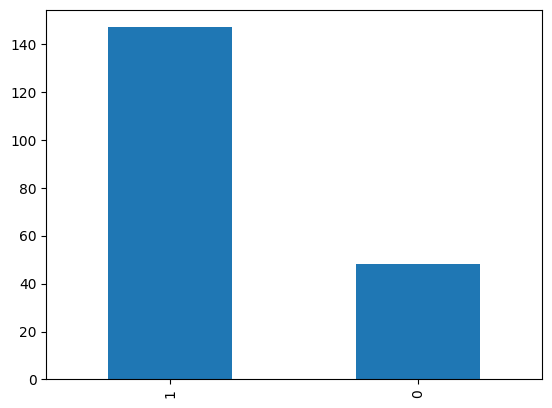

In [11]:
agent("Show the distribution of people suffering with pkson using bar graph using status column.")



> Entering new AgentExecutor chain...
Thought: I need to visualize the data
Action: python_repl_ast
Action Input: df.plot.bar()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar graph showing the distribution of the data in the dataframe.

> Finished chain.


{'input': 'Show the distribution using bar graph',
 'output': 'A bar graph showing the distribution of the data in the dataframe.'}

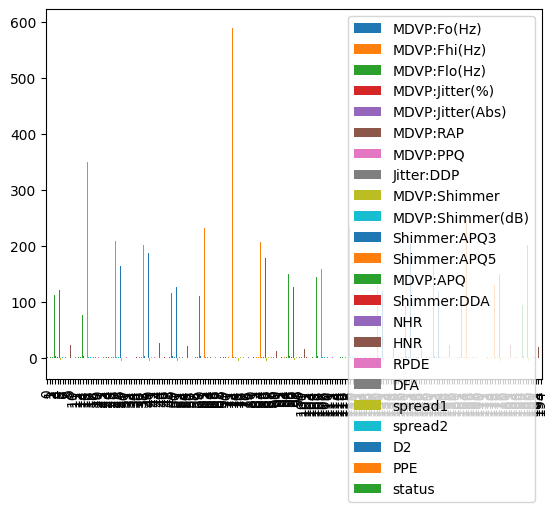

In [6]:
agent("Show the distribution using bar graph")



> Entering new AgentExecutor chain...
Thought: I need to visualize the data to find out if there are any outliers
Action: python_repl_ast
Action Input: df[df['status'] == 1]['MDVP:Fo(Hz)'].plot.box()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: There may be outliers in terms of Fo(Hz) of who are suffering from pkson.

> Finished chain.


{'input': 'Draw boxplot to find out if there are any outliers in terms of Fo(Hz) of who are suffering from pkson',
 'output': 'There may be outliers in terms of Fo(Hz) of who are suffering from pkson.'}

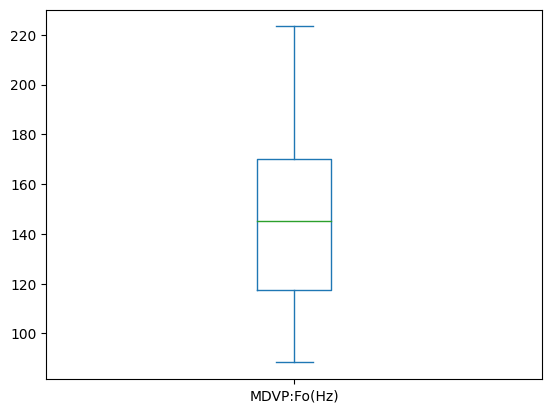

In [8]:
agent("Draw boxplot to find out if there are any outliers in terms of Fo(Hz) of who are suffering from pkson")

In [12]:
agent("""Draw a scatter plot showing relationship
between the most highest affected parameters for both categories of pkson.""")



> Entering new AgentExecutor chain...
Thought: I need to find the two most highest affected parameters and then plot them.
Action: python_repl_ast
Action Input: df.corr()
Observation:                   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465 

InvalidRequestError: ignored



> Entering new AgentExecutor chain...
Thought: I need to create a scatter plot with two different colors for the two categories of pkson.
Action: python_repl_ast
Action Input: df.plot.scatter(x='MDVP:Fo(Hz)', y='MDVP:Flo(Hz)', c='status', colormap='viridis')
Observation: Axes(0.125,0.11;0.62x0.77)
Thought: I now know the final answer
Final Answer: A scatter plot showing the relationship between MDVP:Fo(Hz) and MDVP:Flo(Hz) for both categories of pkson.

> Finished chain.


{'input': 'Draw a scatter plot showing relationship between MDVP:Fo(Hz) and MDVP:Flo(Hz) for both categories of pkson.',
 'output': 'A scatter plot showing the relationship between MDVP:Fo(Hz) and MDVP:Flo(Hz) for both categories of pkson.'}

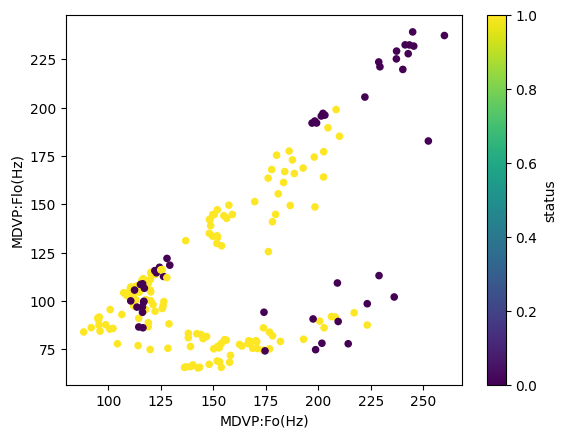

In [4]:
agent("Draw a scatter plot showing relationship between MDVP:Fo(Hz) and MDVP:Flo(Hz) for both categories of pkson.")



> Entering new AgentExecutor chain...
Thought: I need to create a scatter plot with two different colors for the two categories of pkson.
Action: python_repl_ast
Action Input: df.plot.scatter(x='MDVP:Fo(Hz)', y='MDVP:Jitter(%)', c='status', colormap='viridis')
Observation: Axes(0.125,0.11;0.62x0.77)
Thought: I now know the final answer
Final Answer: A scatter plot showing the relationship between MDVP:Fo(Hz) and MDVP:Jitter(%) for both categories of pkson.

> Finished chain.


{'input': 'Draw a scatter plot showing relationship between MDVP:Fo(Hz) and MDVP:Jitter(%) for both categories of pkson.',
 'output': 'A scatter plot showing the relationship between MDVP:Fo(Hz) and MDVP:Jitter(%) for both categories of pkson.'}

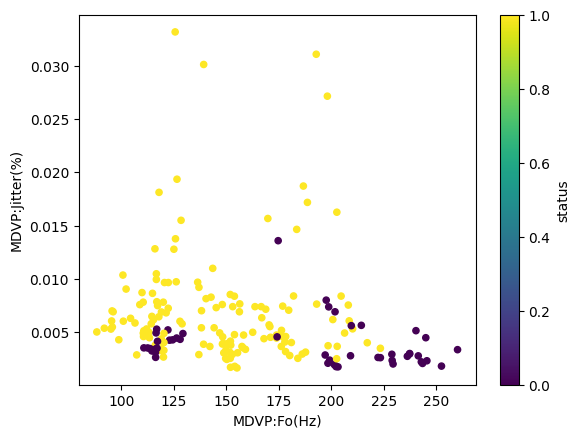

In [6]:
agent("Draw a scatter plot showing relationship between MDVP:Fo(Hz) and MDVP:Jitter(%) for both categories of pkson.")



> Entering new AgentExecutor chain...
Thought: I need to create a scatter plot of spread1 and spread2 for status 1.
Action: python_repl_ast
Action Input: df[df['status'] == 1].plot.scatter(x='spread1', y='spread2')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A scatter plot showing the relationship between spread1 and spread2 for status 1 of pkson.

> Finished chain.


{'input': 'Draw a scatter plot showing relationship between spread1 and spread2 for status 1 of pkson.',
 'output': 'A scatter plot showing the relationship between spread1 and spread2 for status 1 of pkson.'}

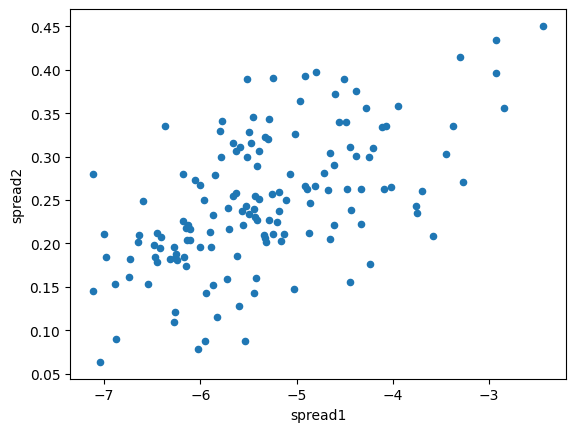

In [8]:
agent("Draw a scatter plot showing relationship between spread1 and spread2 for status 1 of pkson.")



> Entering new AgentExecutor chain...
Thought: I need to use a clustering algorithm to group the data
Action: python_repl_ast
Action Input: from sklearn.cluster import KMeans
Observation: 
Thought: I need to create a KMeans object
Action: python_repl_ast
Action Input: kmeans = KMeans(n_clusters=3)
Observation: 
Thought: I need to fit the data to the KMeans object
Action: python_repl_ast
Action Input: kmeans.fit(df)
Observation: KMeans(n_clusters=3)
Thought:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 I need to plot the data
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt
Observation: 
Thought: I need to plot the data
Action: python_repl_ast
Action Input: plt.scatter(df['MDVP:Fo(Hz)'], df['MDVP:Fhi(Hz)'], c=kmeans.labels_, cmap='rainbow')
Observation: <matplotlib.collections.PathCollection object at 0x797427502bf0>
Thought: I now know the final answer
Final Answer: The k-means algorithm has been run and plotted for the dataset.

> Finished chain.


{'input': 'Run k-means algorithm for the dataset with plotting',
 'output': 'The k-means algorithm has been run and plotted for the dataset.'}

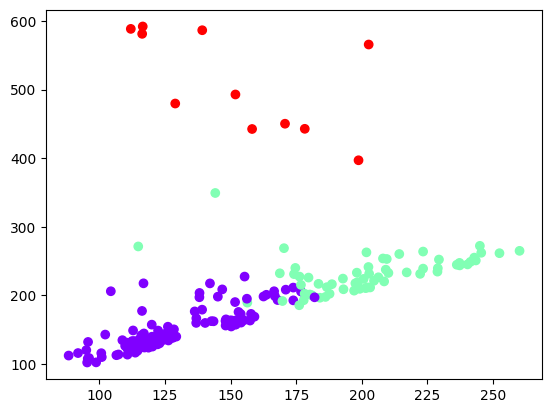

In [10]:
agent("Run k-means algorithm for the dataset with plotting")



> Entering new AgentExecutor chain...
Thought: Hierarchical clustering is a type of unsupervised machine learning algorithm used to group unlabeled data points into clusters based on their similarity.
Action: python_repl_ast
Action Input: from scipy.cluster.hierarchy import dendrogram, linkage
Observation: 
Thought: I need to create a linkage matrix
Action: python_repl_ast
Action Input: Z = linkage(df, 'ward')
Observation: 
Thought: I need to plot the dendrogram
Action: python_repl_ast
Action Input: dendrogram(Z)
Observation: {'icoord': [[5.0, 5.0, 15.0, 15.0], [45.0, 45.0, 55.0, 55.0], [35.0, 35.0, 50.0, 50.0], [25.0, 25.0, 42.5, 42.5], [10.0, 10.0, 33.75, 33.75], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [75.0, 75.0, 92.5, 92.5], [65.0, 65.0, 83.75, 83.75], [21.875, 21.875, 74.375, 74.375], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [115.0, 115.0, 132.5, 132.5], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [123.75, 123.75, 162.5, 162.5]

InvalidRequestError: ignored

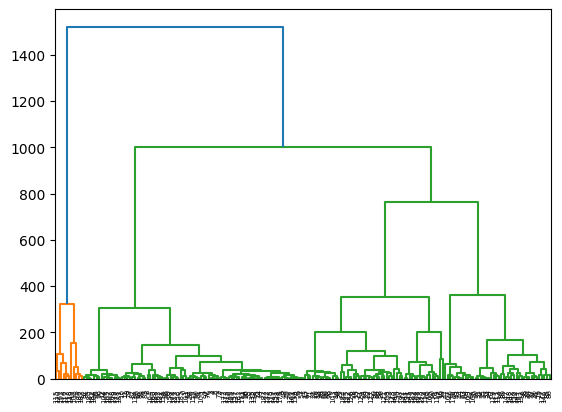

In [11]:
agent("Run hierarchical clustering algorithm for the dataset with dendrogram")